In [7]:
import matplotlib.pyplot as plt
import numpy as np
from pydrake.all import (
    DiagramBuilder,
    LogVectorOutput,
    Simulator,
    SymbolicVectorSystem,
    Variable,
    Linearize,
    Jacobian
)

from underactuated import plot_2d_phase_portrait

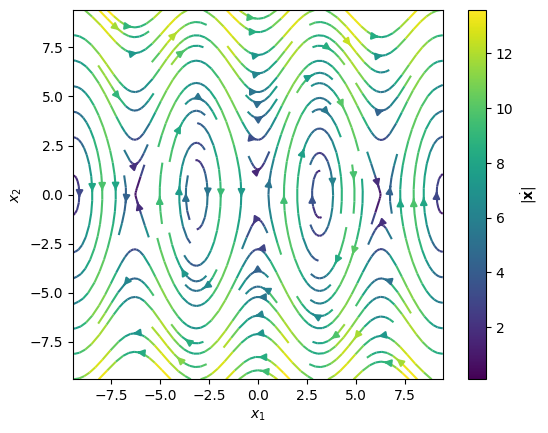

In [10]:
#dynamics of the non liner simple pendulum when b=0
m=1
l=1
g=9.81
b=0

def dynamics(x):
    x1,x2=x
    f1=x2
    f2=(1/(m*l**2)*((m*g*l*np.sin(x1))-(b*x2)))
    return np.array([f1,f2])

plot_2d_phase_portrait(dynamics, x1lim=(-3*np.pi, 3*np.pi), x2lim=(-3*np.pi,3*np.pi))

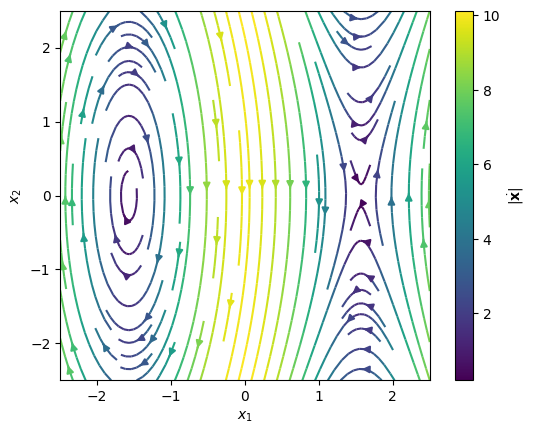

In [27]:
# linearize the dynamics
#define symbolic state variables

def Linear_dynamics(x):
    x1,x2=x
    x_bar=[0,0]
    x1=x1-x_bar[0]
    x2=x2-x_bar[1]
    f1=x2
    f2=-g*np.cos(x1)-b
    return np.array([f1,f2])


plot_2d_phase_portrait(Linear_dynamics, x1lim=(-2.5, 2.5), x2lim=(-2.5,2.5))

In [29]:
import numpy as np
from pydrake.symbolic import Variable, sin, cos, Jacobian

# Define symbolic state variables
x1 = Variable('x1')  # Angular position
x2 = Variable('x2')  # Angular velocity

# Define parameters as symbolic variables
m = Variable('m')
l = Variable('l')
g = Variable('g')
b = Variable('b')

# Define the dynamics as symbolic expressions
f1 = x2
f2 = (1 / (m * l**2)) * (m * g * l * sin(x1) - b * x2)

# State vector
x = np.array([x1, x2])

# Dynamics vector (this is your system's equations)
f = np.array([f1, f2])

# Compute the Jacobian of the dynamics with respect to the state vector
A = Jacobian(f, x)

# Print the Jacobian matrix
print("Jacobian matrix:")
print(A)

# Define the fixed point for linearization
fixed_point = {x1: 0, x2: 0}

# Evaluate the Jacobian at the fixed point
A_at_fixed_point = A.Substitute(fixed_point)

print("Jacobian matrix at the fixed point (x1=0, x2=0):")
print(A_at_fixed_point)


Jacobian matrix:
[[<Expression "0"> <Expression "1">]
 [<Expression "((pow(m, 2) * pow(l, 3) * g * cos(x1)) / pow((m * pow(l, 2)), 2))">
  <Expression "((-1 * m * pow(l, 2) * b) / pow((m * pow(l, 2)), 2))">]]


AttributeError: 'numpy.ndarray' object has no attribute 'Substitute'